<a href="https://colab.research.google.com/github/shavindukesara/Telco-Churn-Predictor/blob/main/reports/eda_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streaming

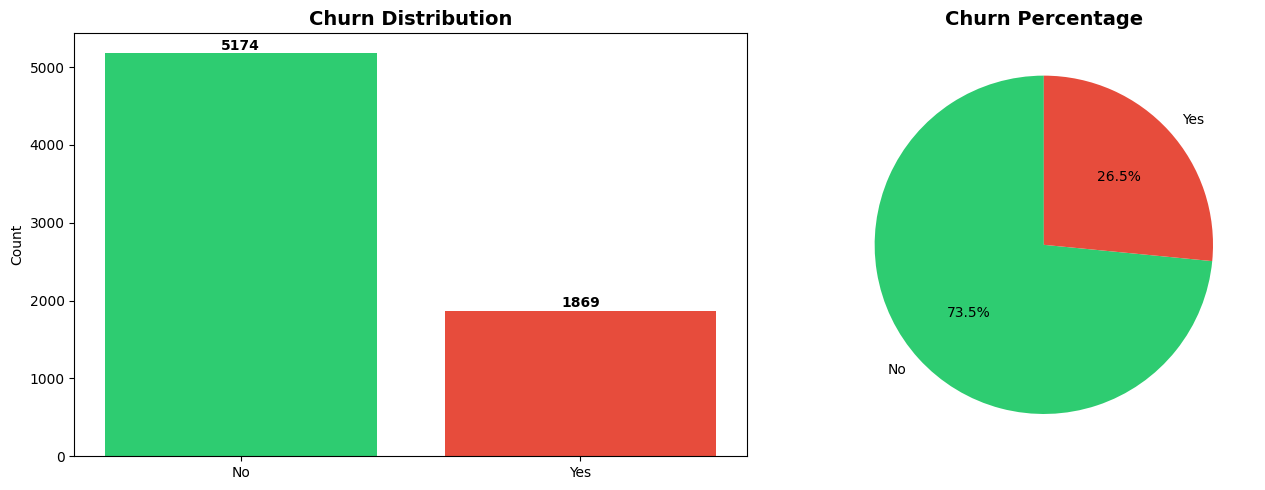


Insight: Imbalanced dataset - 73% No Churn, 27% Churn


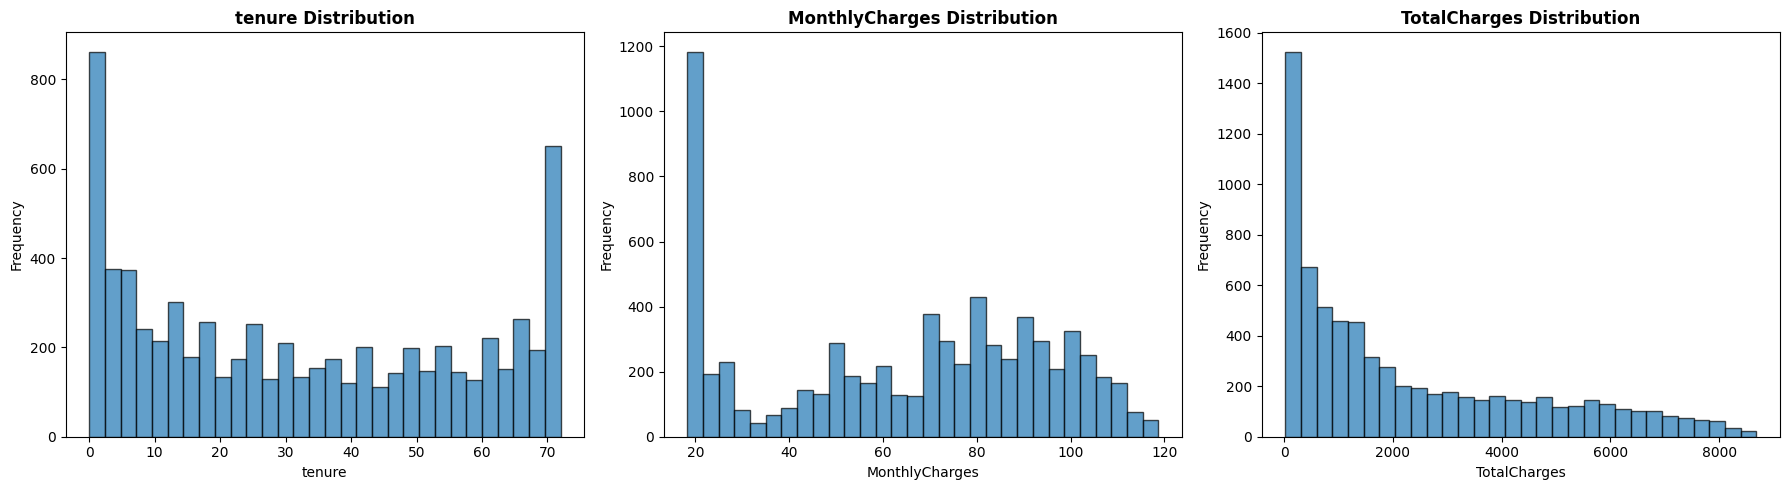

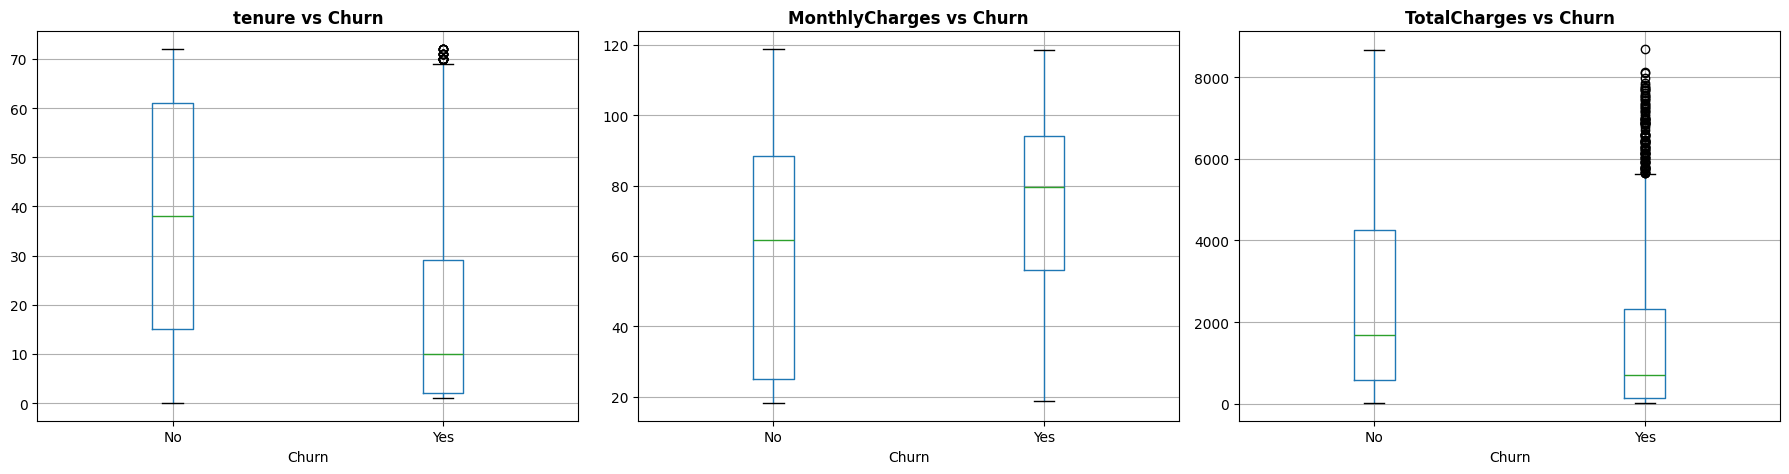


Insights:
- Churned customers have lower tenure (shorter relationship)
- Churned customers have higher monthly charges
- Churned customers have lower total charges


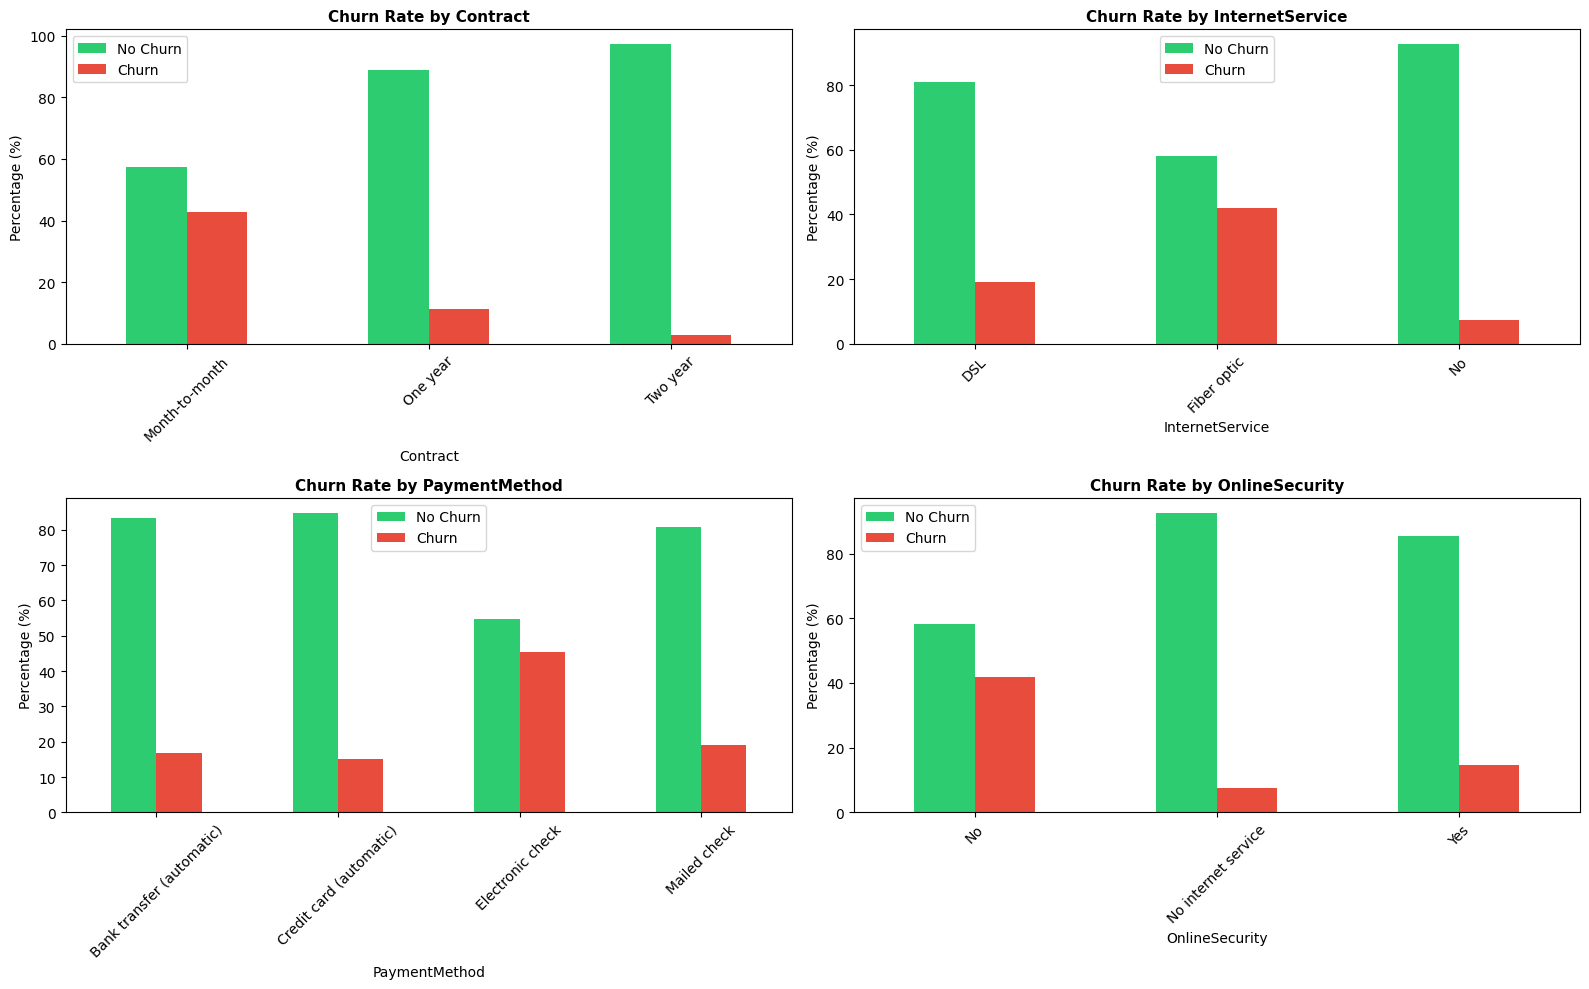


Key Findings:
- Month-to-month contracts: ~42% churn rate (HIGHEST)
- Fiber optic internet: Higher churn rate
- Electronic check payment: Higher churn rate
- No online security: Higher churn rate

--- Correlation Analysis ---


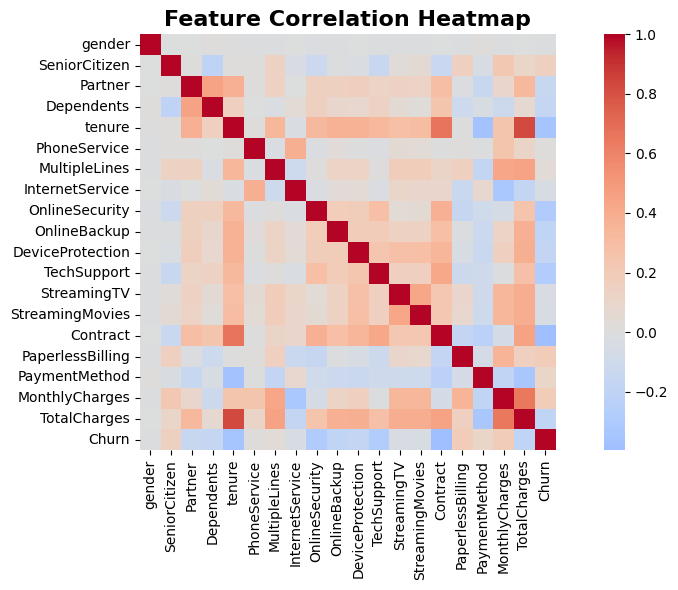


Top 10 Features Correlated with Churn:
Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
TotalCharges        0.199037
OnlineBackup        0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
DeviceProtection    0.178134
Dependents          0.164221
Name: Churn, dtype: float64


<Figure size 1000x600 with 0 Axes>

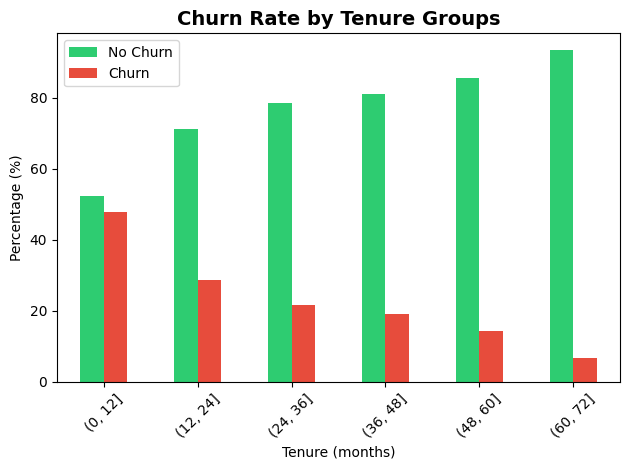

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

print(f"Dataset loaded: {df.shape}")
print(df.head())

# Basic Info
print("\n--- Dataset Info ---")
df.info()
print(f"\nDataset shape: {df.shape}")
print(f"\nMissing values:\n{df.isnull().sum()}")

# Target Variable Analysis
print("\n--- Target Variable Distribution ---")
print(df['Churn'].value_counts())
print(f"\nChurn Rate: {df['Churn'].value_counts(normalize=True)['Yes']*100:.2f}%")

# Visualization 1: Churn Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
churn_counts = df['Churn'].value_counts()
axes[0].bar(churn_counts.index, churn_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Churn Percentage', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nInsight: Imbalanced dataset - 73% No Churn, 27% Churn")

# Numerical Features Analysis
print(f"\nMissing values in TotalCharges before conversion: {df['TotalCharges'].isnull().sum()}")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Missing values in TotalCharges after conversion: {df['TotalCharges'].isnull().sum()}")

# For EDA visualizations, use non-null values
df_clean = df.dropna(subset=['TotalCharges'])

# Update the histograms to use df_clean:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    axes[idx].hist(df_clean[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualization 3: Numerical Features vs Churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    df.boxplot(column=col, by='Churn', ax=axes[idx], patch_artist=True,
               boxprops=dict(facecolor='lightblue'),
               medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'{col} vs Churn', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(col)
    # Remove the automatic "Boxplot grouped by Churn" title
    axes[idx].set_title(f'{col} Distribution by Churn', fontsize=12, fontweight='bold')

plt.suptitle('')
plt.tight_layout()
plt.show()

print("\nInsights:")
print("- Churned customers have lower tenure (shorter relationship)")
print("- Churned customers have higher monthly charges")
print("- Churned customers have lower total charges")

# Categorical Features Analysis
# Visualization 4: Key Features vs Churn
key_features = ['Contract', 'InternetService', 'PaymentMethod', 'OnlineSecurity']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    churn_data = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    churn_data.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'Churn Rate by {feature}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

print("\nKey Findings:")
print("- Month-to-month contracts: ~42% churn rate (HIGHEST)")
print("- Fiber optic internet: Higher churn rate")
print("- Electronic check payment: Higher churn rate")
print("- No online security: Higher churn rate")

# Correlation Analysis
print("\n--- Correlation Analysis ---")
df_corr = df.copy()

# Encode categorical variables for correlation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

for col in categorical_cols:
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))

df_corr = df_corr.drop('customerID', axis=1)
df_corr['TotalCharges'] = pd.to_numeric(df_corr['TotalCharges'], errors='coerce')
df_corr['TotalCharges'] = df_corr['TotalCharges'].fillna(df_corr['TotalCharges'].median())

correlation_matrix = df_corr.corr()

# Top correlations with Churn
corr_with_churn = correlation_matrix['Churn'].abs().sort_values(ascending=False)
top_features = corr_with_churn.head(15).index.tolist()
top_corr_matrix = correlation_matrix.loc[top_features, top_features]

# Visualization 5: Top Features Correlation Heatmap with better colors
plt.figure(figsize=(14, 10))
sns.heatmap(top_corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='RdYlBu_r',  # Better color scheme: Red-Yellow-Blue reversed
            center=0,
            square=True,
            linewidths=0.5,
            linecolor='white',
            cbar_kws={'shrink': 0.8, 'label': 'Correlation'},
            annot_kws={'size': 9, 'weight': 'bold'})

plt.title('Top 15 Features Correlation Heatmap (with Churn)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


churn_corr = correlation_matrix['Churn'].abs().sort_values(ascending=False)
print("\nTop 15 Features Correlated with Churn:")
print(churn_corr[1:16])

# Visualization 6: Tenure Groups Analysis
tenure_bins = [0, 12, 24, 36, 48, 60, 72]
df['TenureGroup'] = pd.cut(df['tenure'], bins=tenure_bins, labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
tenure_churn = pd.crosstab(df['TenureGroup'], df['Churn'], normalize='index') * 100

plt.figure(figsize=(10, 6))
tenure_churn.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Churn Rate by Tenure Groups', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (months)')
plt.ylabel('Percentage (%)')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nInsight: Churn rate decreases significantly with tenure")

print("""
KEY FINDINGS:
1. Dataset is imbalanced (73% No Churn, 27% Churn)
2. Contract type is strongest predictor (month-to-month highest churn)
3. Tenure inversely correlated with churn
4. Monthly charges positively correlated with churn
5. Internet service type and payment method affect churn
6. Customers without add-on services churn more
""")